# Pré-processamento de Dados

## Tratamento de Dados - Detecção de Anomalias

In [1]:
#Importação de bibliotecas
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
dados = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 
       453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 
       440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 
       512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 
       689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543,30, 1300, 1350, 1400]

# Transformar lista em array numpy 
dados = np.array(dados)

### Visualizando os valores anômalos

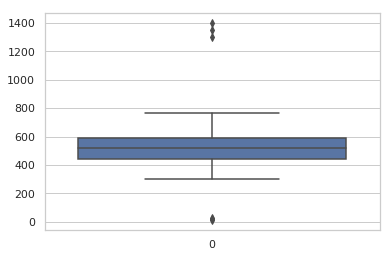

In [3]:
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=dados);

In [4]:
# 1° Passo - Verificar o valor da média
np.mean(dados, axis=0) #Axis = 0 (array só possui uma coluna)

530.3673469387755

In [5]:
# 2° Passo - Verificar o valor do desvio padrão
np.std(dados, axis=0) #Axis = 0 (array só possui uma coluna)

192.51166875607043

In [6]:
# Definição de regras para considerar o valor como anômalo: O valor deve ser menor que (media - 2 * desvio_padrao )
#  e deve ser maior que (media + 2 * desvio_padrao ), o intervalo desses valores são os valores válidos

media = np.mean(dados, axis=0)
desvio_padrao = np.std(dados, axis=0)

In [7]:
fronteira_menor = (media - (2 * desvio_padrao))
fronteira_menor

145.34400942663467

In [8]:
fronteira_maior = (media + (2 * desvio_padrao))
fronteira_maior

915.3906844509164

In [9]:
# Listar valores abaixo da fronteira_menor (abaixo da média em 2x o desvio padrão)
for x in dados:
    if(x < fronteira_menor):
        print(x)

10
20
30


In [10]:
# Listar valores acima da fronteira_maior (acima da média em 2x o desvio padrão)
for x in dados:
    if(x > fronteira_maior):
        print(x)

1300
1350
1400


O problema de se encontrar dados anômalos pode ser resolvido através de substituição de valores pela média, calcular com alguma outra fórmula como a de distância entre outros e substituir os valores anômalos pelo da distância ou remover esses valores

In [11]:
# Remoção de valores muito abaixo da média (menores que a fronteira_menor)
dados = [x for x in dados if (x > fronteira_menor)]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543, 1300, 1350, 1400]


In [12]:
# Remoção de valores muito acima da média (maiores que a fronteira_maior)
dados = [x for x in dados if (x < fronteira_maior)]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]


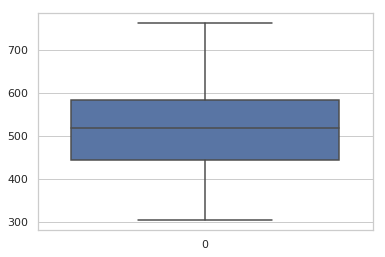

In [13]:
# Visualizando valores após a remoção dos dados anômalos:
sns.boxplot(data=dados); # Todos os dados estão entre as fronteiras menor e maior

## Pré-Processamento de dados - Discretização

In [14]:
# Conjunto de dados de exemplo
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

In [1]:
# Aplicando a discretização dos dados 
altura = pd.qcut(altura,3,labels=['P','M','G'])
altura

NameError: name 'pd' is not defined

In [16]:
# Verificar a quantidade de elementos em cada categoria
altura.value_counts()

P    2
M    2
G    2
dtype: int64

In [17]:
# Ler o dataset
dataset = pd.read_csv('databases/kc_house_data.csv')

In [18]:
# Quantidade de registros por andares
dataset['floors'].value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

Diferença dos métodos **cut** e **qcut** do pandas: O método _**qcut**_ faz com que você tenha a mesma quantidade de registros por agrupamento (baseado em amostras, uma certa parte dos registros). Já o método _**cut**_ permite particionar os dados em agrupamentos com tamanhos diferentes (de acordo com os valores em si e não com a frequência desses valores), nesse caso ocorrem freqüências mais altas nos compartimentos internos e menos no exterior.

In [19]:
# Discretizar os valores dos andares
dataset['floors_labels'] = pd.cut(
    dataset['floors'],
    5,
    labels=['Muito-Pequeno','Pequeno','Medio','Grande','Muito-Grande']
)

In [20]:
# Verificando valores únicos do dataset
dataset['floors_labels'].unique()

[Muito-Pequeno, Pequeno, NaN, Grande, Medio, Muito-Grande]
Categories (5, object): [Muito-Pequeno < Pequeno < Medio < Grande < Muito-Grande]

In [21]:
# Quantidade de registros por tamanho
dataset['floors_labels'].value_counts()

Muito-Pequeno    12589
Pequeno           8241
Grande             613
Medio              161
Muito-Grande         8
Name: floors_labels, dtype: int64

## Pré-Processamento de dados - Normalização

#### norma L2 é definida como a raiz quadrada do somatório de todos os elementos do vetor ao quadrado.

![l2-norma](imagens/l2-norma.png)

##### vejamos um simples exemplo do calculo da norma l2.

![l2-norma-exemplo](imagens/l2-norma-exemplo.png)

In [22]:
# Importação das bibliotecas necessárias. OBS - A normalização altera o formato dos dados
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [23]:
data = [
    [-1, 2],
    [0.5, 6],
    [0, 10],
    [1, 18]
]
data

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]

In [24]:
# Média dos valores
np.mean(data)

4.5625

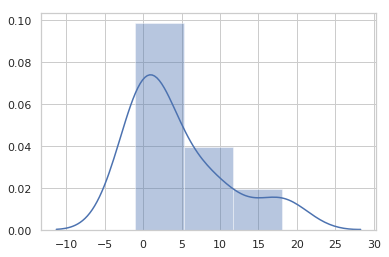

In [25]:
# Visualizar a distribuição dos dados
sns.distplot(np.array(data).reshape(-1)) # Reshape transforma o array  para um array em uma única dimensão
plt.show()

In [26]:
# Instanciando o normalizador pela norma L2
normalizer = Normalizer().fit(data)

In [27]:
# Aplicando a normalização nos dados
data2 = normalizer.transform(data)
data2

array([[-0.4472136 ,  0.89442719],
       [ 0.08304548,  0.99654576],
       [ 0.        ,  1.        ],
       [ 0.05547002,  0.99846035]])

In [28]:
#  Valor da média dos dados normalizados
np.mean(data2)

0.4475919008033141

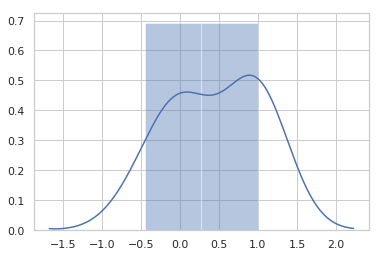

In [29]:
# Visualizar a distribuição dos dados
sns.distplot(np.array(data2).reshape(-1)) # Reshape transforma o array para um array em uma única dimensão
plt.show()

## Técnicas de pre-processamento de Dados - Standartization

**Standartization:** Padroniza os dados em uma mesma faixa de valores - Não altera sua distribuição

In [30]:
data = np.random.normal(size = 50)
data

array([-1.55287277, -0.81191874, -0.19917713, -1.08107871,  0.72745887,
        0.45957474, -0.34830235,  2.4831374 , -0.84543531, -0.01863781,
       -0.56953636, -0.82365399, -0.20603037,  0.67318331, -1.80573011,
        1.5294045 , -1.13319713,  1.29523802,  0.08014826,  1.08617569,
       -0.26447763, -0.70556841, -1.57175198, -1.61946544, -0.12521407,
       -1.59155063,  0.38365231,  0.13253481, -0.10260115, -0.71119147,
       -0.53477273, -0.79477408,  0.12035575, -1.37631452, -1.54041045,
       -0.69385351, -0.8790485 , -1.63231687, -1.09465511,  0.64039072,
        1.68888085,  1.5878556 , -0.17804382, -0.67207957,  0.31587906,
        0.48964945, -0.66585637, -0.23037587, -1.15435938, -0.45329588])

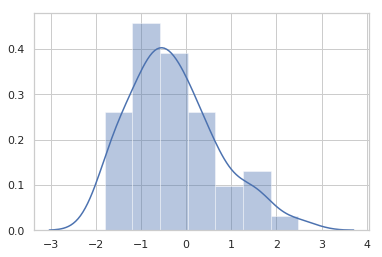

In [31]:
# Visualizar a distribuição dos dados
sns.distplot(np.array(data).reshape(-1))
plt.show()

In [32]:
data = data.reshape(-1,1) #Reshape nos dados para usar o MinMaxScaler
scaler = MinMaxScaler().fit(data)
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [33]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[0.05895667]
 [0.23171883]
 [0.37458676]
 [0.16896101]
 [0.59064286]
 [0.52818252]
 [0.33981646]
 [1.        ]
 [0.22390405]
 [0.41668163]
 [0.28823314]
 [0.22898262]
 [0.37298885]
 [0.57798788]
 [0.        ]
 [0.77762594]
 [0.15680899]
 [0.72302726]
 [0.43971476]
 [0.67428192]
 [0.35936118]
 [0.25651567]
 [0.05455476]
 [0.0434298 ]
 [0.39183212]
 [0.04993847]
 [0.51048031]
 [0.45192931]
 [0.39710459]
 [0.25520458]
 [0.29633869]
 [0.23571631]
 [0.44908962]
 [0.10012331]
 [0.06186241]
 [0.25924713]
 [0.21606674]
 [0.04043334]
 [0.16579552]
 [0.5703419 ]
 [0.81480973]
 [0.7912545 ]
 [0.37951424]
 [0.26432398]
 [0.49467818]
 [0.53519479]
 [0.265775  ]
 [0.3673124 ]
 [0.15187476]
 [0.31533598]]


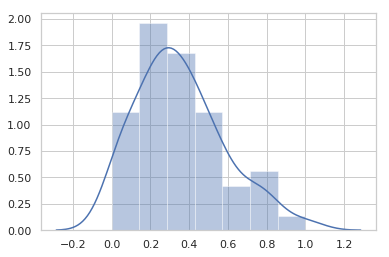

In [34]:
# Não muda a forma do gráfico, mudará apenas a escala de valores (Muito útil para técnicas classificadoras como de distância onde precisam de valores que não sejam discrepantes entre todas as features - Padroniza esses valores)
sns.distplot(np.array(data_scaled).reshape(-1))
plt.show()

## StandardScaler - Técnica de Pré-Processamento

* Padroniza a escala dos dados sem interferir na sua forma

* Mantém a escala dos dados mais fiel que a Técnica MinMaxScale

In [40]:
data = np.random.normal(size = 50)
print(data)

[-0.21137803  0.62866325  0.90464103 -0.21365201  0.04572065 -0.04451654
  0.30594332 -0.06539251 -0.87572695  0.78502995  0.14462105  0.73565691
 -0.54075177  1.11287804  1.10537483 -1.0601662   0.23100875 -1.71574198
 -0.75230104 -0.18619737  0.56176193  1.87305054 -0.5346204   0.51694317
  1.33931499  0.72630339  0.68232793 -0.64040949 -0.13971437  0.97076143
  1.30862434 -0.75940305  0.66278603  0.15891004 -0.61584587  0.44836843
  0.53101726 -0.17193833 -1.33084358  1.20559729  1.01838039  2.28734251
 -0.67816467 -0.106013    0.57935568  0.52744448  1.16909407 -0.69201894
 -0.85509547  0.42468076]


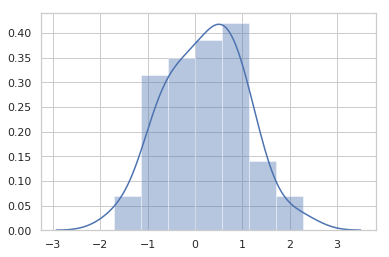

In [41]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

In [42]:
data = data.reshape(-1,1) #Reshape nos dados para usar o StandardScaler
scaler = StandardScaler().fit(data)

In [43]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[-0.51824239]
 [ 0.50031757]
 [ 0.83494389]
 [-0.52099962]
 [-0.20650721]
 [-0.31592087]
 [ 0.10901584]
 [-0.34123323]
 [-1.32377329]
 [ 0.68991404]
 [-0.0865893 ]
 [ 0.63004865]
 [-0.91761195]
 [ 1.08743371]
 [ 1.07833599]
 [-1.54740806]
 [ 0.0181568 ]
 [-2.34230143]
 [-1.17411793]
 [-0.48771055]
 [ 0.41919893]
 [ 2.00915185]
 [-0.91017759]
 [ 0.36485566]
 [ 1.36199119]
 [ 0.61870739]
 [ 0.56538663]
 [-1.0384481 ]
 [-0.43134936]
 [ 0.91511566]
 [ 1.32477841]
 [-1.1827292 ]
 [ 0.54169184]
 [-0.06926373]
 [-1.00866443]
 [ 0.28170797]
 [ 0.38192066]
 [-0.4704213 ]
 [-1.87560758]
 [ 1.1998569 ]
 [ 0.9728542 ]
 [ 2.51148574]
 [-1.0842267 ]
 [-0.39048605]
 [ 0.44053156]
 [ 0.37758862]
 [ 1.15559631]
 [-1.10102517]
 [-1.29875738]
 [ 0.2529864 ]]


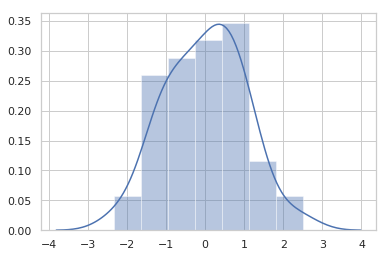

In [44]:
sns.distplot(np.array(data_scaled).reshape(-1))
plt.show()